In [2]:
from functions import parse_time_data, save_time_data_info_file, show_heatmap, show_3D_plot, show_bar_chart, show_box_plot

In [3]:
# Read the CSV file into a DataFrame
summary_result_path = "../../exp_results_test_20240328_30ms_final_5/result_summary.csv"
time_data = parse_time_data(summary_result_path)

In [4]:
save_file_path = "../../exp_results/time_consumption_summary.csv"
save_time_data_info_file(time_data, save_file_path)

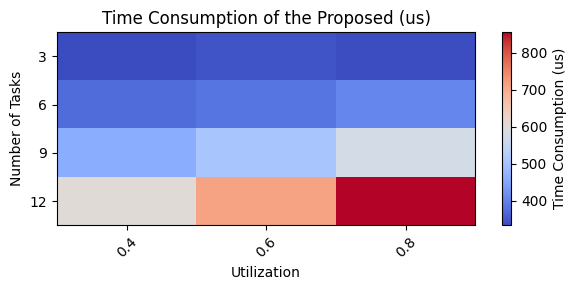

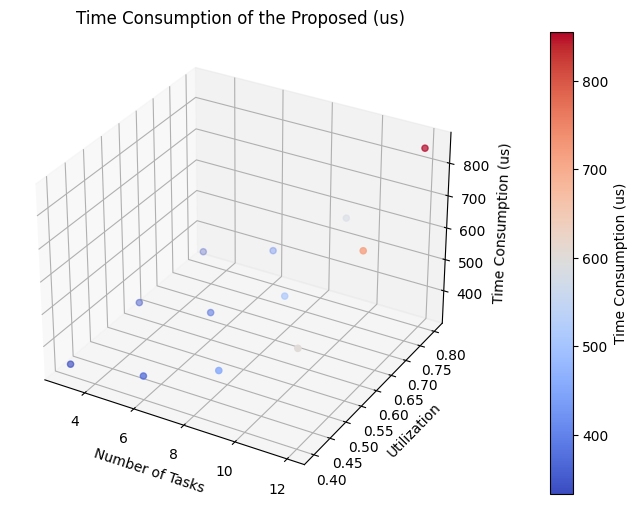

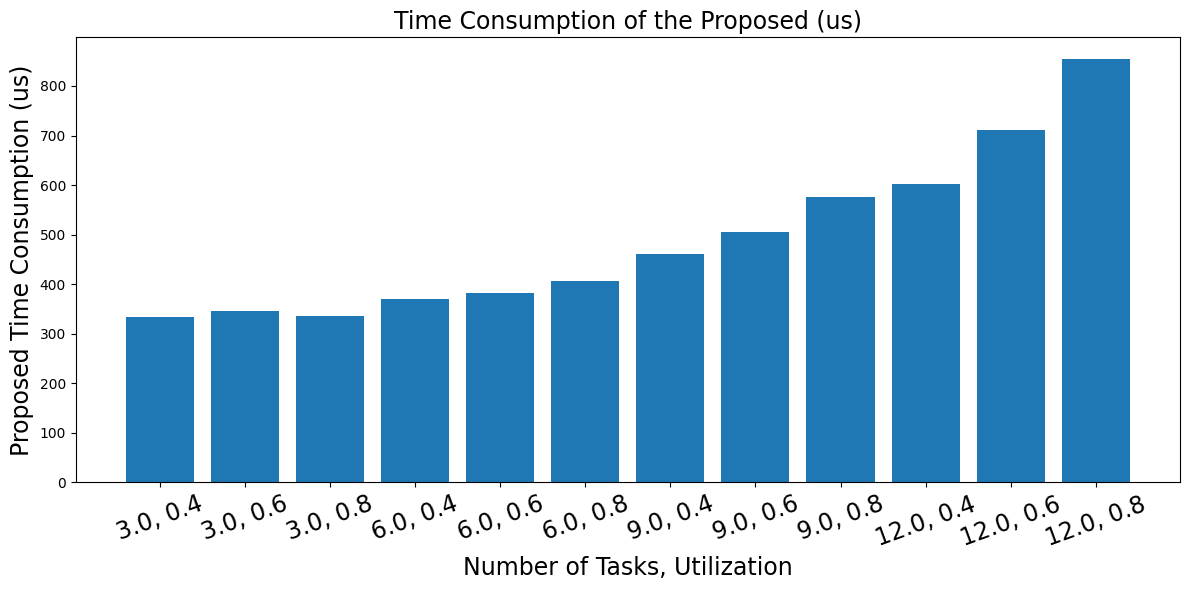

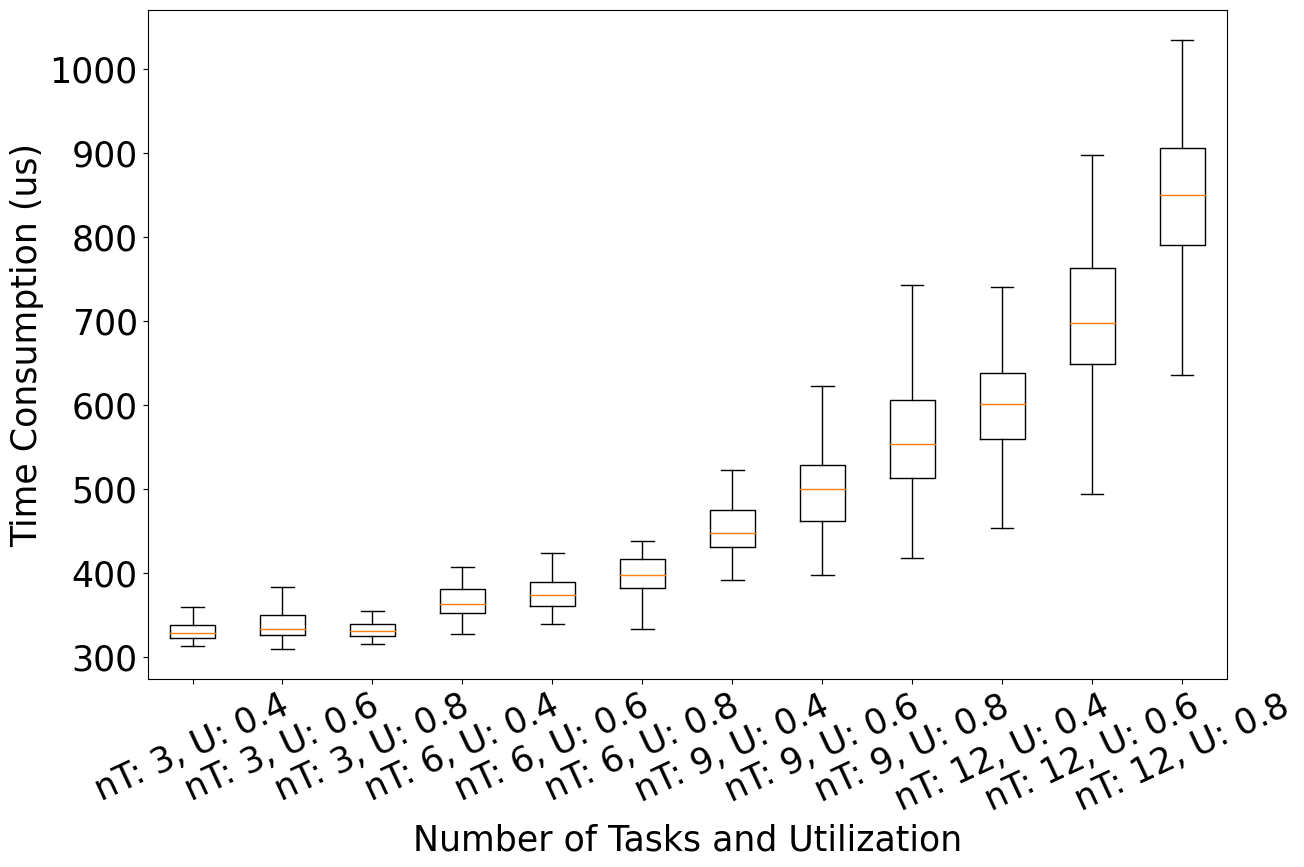

Max :  1494 Min :  310


In [5]:
# visualize the time consumption of the proposed algorithm
values = "proposed_timeConsumption(us)"
title = 'Time Consumption of the Proposed (us)'
show_heatmap(time_data, values, title)
show_3D_plot(time_data, time_data[values], title)
show_bar_chart(time_data, values, title, 17, 20)
show_box_plot(summary_result_path, values, title, 25, 25)

In [6]:
# # visualize the time consumption of the simulator
# values = "simulator_timeConsumption(us)"
# title = 'Time Consumption of the simulator (us)'
# show_heatmap(time_data, values, title)
# show_3D_plot(time_data, time_data[values], title)
# show_bar_chart(time_data, values, title, 17, 20)
# show_box_plot(summary_result_path, values, title, 17, 20)